We are going to retrieve some air temperature TMY data from the Solcast API and plot it.

In [1]:
from solcast import tmy

To test the API you can use [unmetered locations](https://docs.solcast.com.au/?_gl=1*k80zyt*_ga*MzQ4NzM2ODEuMTY5MDI2MzUwOQ..*_ga_BYH3TC3R79*MTY5MjIzOTc0NS4xOC4xLjE2OTIyMzk3NzQuMC4wLjA.&_ga=2.240435015.595123581.1692145391-34873681.1690263509#unmetered-locations), in the SDK:

In [2]:
from solcast.unmetered_locations import UNMETERED_LOCATIONS

site = UNMETERED_LOCATIONS["Giza Pyramid Complex"]
site

{'latitude': 29.977296,
 'longitude': 31.132496,
 'resource_id': '8d10-f530-af85-5cbb'}

Let's retreive the TMY data for the Giza Pyramids in Cairo. The API lets you specify the timezone in the request by adding a `time_zone` parameter:

In [3]:
res = tmy.radiation_and_weather(
    latitude=site["latitude"],
    longitude=site["longitude"],
    output_parameters=["ghi", "air_temp"],
    time_zone=2  # in January there are 2h between the Cairo timezone and UTC
)

The `Response` object in the SDK lets you easliy transform the data received from the API to a Pandas DataFrame. Make sure that Pandas is installed if you want to use this functionality:

In [9]:
df = res.to_pandas()
df.head()

,ghi,air_temp
period_end,,
2059-01-01 01:00:00+02:00,0,11
2059-01-01 02:00:00+02:00,0,11
2059-01-01 03:00:00+02:00,0,10
2059-01-01 04:00:00+02:00,0,10
2059-01-01 05:00:00+02:00,0,10


For visualization purposes we can create a copy shifted to UTC:

<Axes: xlabel='period_end'>

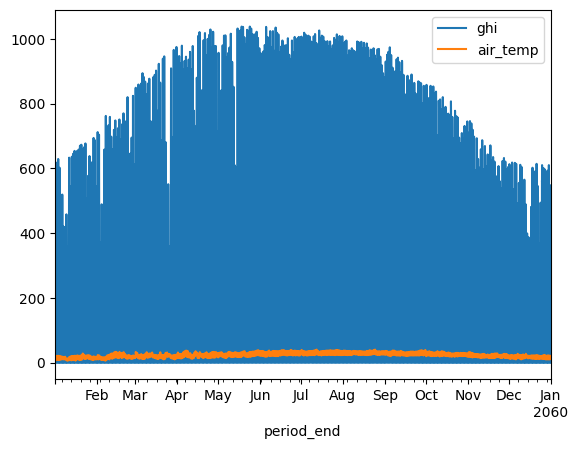

In [6]:
import matplotlib.pyplot as plt

df.plot()

<Axes: xlabel='period_end'>

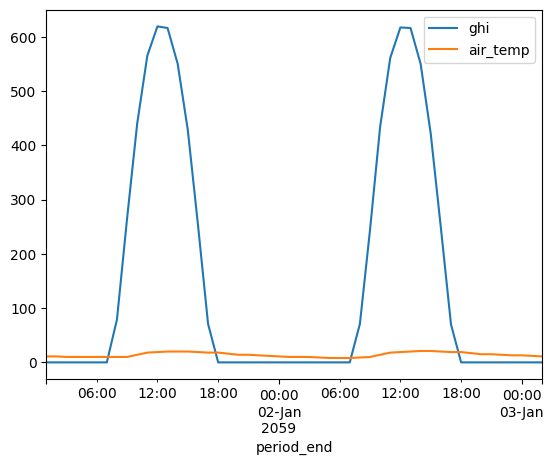

In [8]:
df[:50].plot()
